In [90]:
import pandas as pd 
import numpy as np 


In [91]:

df=pd.read_csv('./default/UCI_Credit_Card_7879_9833.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [92]:
# there is no null value present in datasets 
df[df.isnull()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [93]:
import shutil
import os
import re

class datavalidation:
    def __init__(self):
        pass
    
    def valid(self,dataset_path):
        st=os.listdir(dataset_path)
        for i in st:
            file=re.findall("[UCI_Credit_Card]+['']+[0-9]+['_']+[0-9]+['.']+[csv]",i)
            if file!=[]:
                for i in file:
                    os.makedirs('GoodDataSet',exist_ok=True)
                    shutil.copy(dataset_path+'/UCI_Credit_card_7879_9833','GoodDataSet')
            
            else:
                try:
                    os.makedirs('BadDataSet',exist_ok=True)
                    shutil.copy(dataset_path+'/'+i,'BadDataSet')
                except:
                    pass


In [94]:
df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
import seaborn as sns



<Axes: >

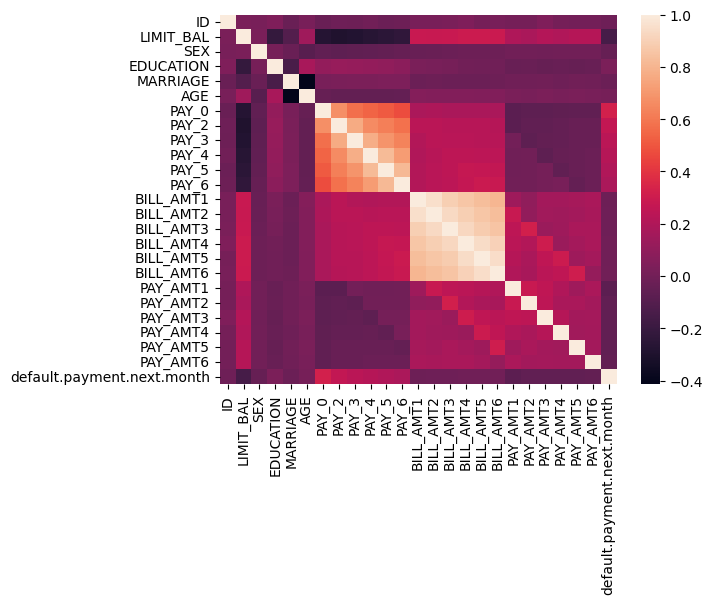

In [96]:
sns.heatmap(df.corr())
# we can see correlation among bill amount , pay schedule , pay amount 

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 

In [98]:
#finding mulicollinearity using vif

for i in range(1,len(df.columns[1::])):

    print(f'{df.columns[i]} and it {variance_inflation_factor(df,i)}')

# below we can see bill amount,sex,age,marriage has very high collinearity and hence we have two option
# Either we drop the columns with high collinearity or make use of PCA 
# Its necessary to make pca as we cant drop column as each columns has its own significance for predicting 

LIMIT_BAL and it 4.046691178686974
SEX and it 9.257822086415596
EDUCATION and it 6.798289605998369
MARRIAGE and it 6.457640754170303
AGE and it 11.40013976149614
PAY_0 and it 1.997811493562567
PAY_2 and it 3.216888726776898
PAY_3 and it 3.7300026462553246
PAY_4 and it 4.445614884181236
PAY_5 and it 4.990164463254344
PAY_6 and it 3.46389325534473
BILL_AMT1 and it 20.844042295880307
BILL_AMT2 and it 38.22808248204301
BILL_AMT3 and it 31.78333010024126
BILL_AMT4 and it 29.699787588651333
BILL_AMT5 and it 36.07861319493973
BILL_AMT6 and it 21.42759587838125
PAY_AMT1 and it 1.9086056286656705
PAY_AMT2 and it 2.3856700190948192
PAY_AMT3 and it 1.9118287799859561
PAY_AMT4 and it 1.8075577273929604
PAY_AMT5 and it 1.854909604874676
PAY_AMT6 and it 1.2708037388089948


In [99]:
from sklearn.decomposition import PCA

p=PCA()
c=p.fit_transform(df[df.columns[1:-1]])

<Axes: >

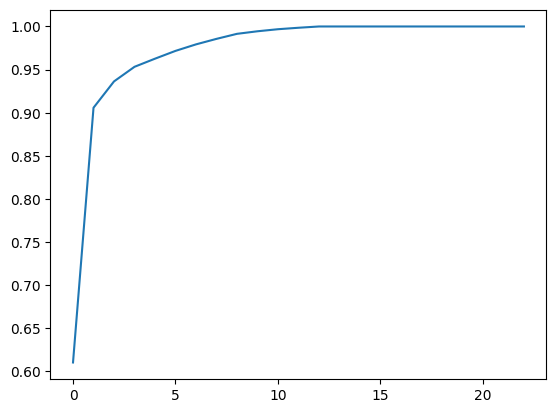

In [100]:

sns.lineplot(x=range(0,len(p.explained_variance_ratio_)),y=np.cumsum(p.explained_variance_ratio_))


In [101]:
np.cumsum(p.explained_variance_ratio_)

array([0.61043701, 0.90579083, 0.93631502, 0.95324361, 0.96266403,
       0.97170578, 0.97925023, 0.98563505, 0.99147214, 0.99443885,
       0.99682391, 0.99852165, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [102]:
from kneed import KneeLocator

In [103]:
kn=KneeLocator(x=range(0,len(p.explained_variance_ratio_)),y=np.cumsum(p.explained_variance_ratio_),S=1,curve="concave", direction="increasing")
kn.knee

2

In [104]:
pca_df=pd.DataFrame(c)

x=pca_df[pca_df.columns[0:kn.knee]]
x

,0,1
0,-166488.191085,-75538.153665
1,-114226.976816,9780.671251
2,-98432.362180,-33471.387331
3,-71230.675903,-95224.273104
4,-114834.618365,-68729.185233
...,...,...
29995,200018.431424,-55465.636023
29996,-97718.568024,35089.032854
29997,-140206.128048,-77857.496539
29998,-41427.740774,-74908.303672


In [105]:
y=df[[df.columns[-1]]]
y

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [106]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.3)

In [107]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

lr=GridSearchCV(LogisticRegressionCV(),param_grid={
 'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
})
lr.fit(xtrain,ytrain)
lr.best_params_

# lr.fit(xtrain,ytrain)
# lr.predict(xtest)
# lr.score(xtest,ytest)

/Users/phoenixonwork/anaconda3/envs/credit_card_default/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phoenixonwork/anaconda3/envs/credit_card_default/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phoenixonwork/anaconda3/envs/credit_card_default/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phoenixonwork/anaconda3/envs/credit_card_default/lib/python3.11/site-

{'penalty': 'l1', 'solver': 'liblinear'}

In [113]:
new_lr=LogisticRegressionCV(penalty='l1',solver='liblinear')
new_lr.fit(xtrain,ytrain)
new_lr.score(xtest,ytest)


/Users/phoenixonwork/anaconda3/envs/credit_card_default/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.779

In [114]:
np.unique(new_lr.predict(x))

array([0])

In [115]:
x

,0,1
0,-166488.191085,-75538.153665
1,-114226.976816,9780.671251
2,-98432.362180,-33471.387331
3,-71230.675903,-95224.273104
4,-114834.618365,-68729.185233
...,...,...
29995,200018.431424,-55465.636023
29996,-97718.568024,35089.032854
29997,-140206.128048,-77857.496539
29998,-41427.740774,-74908.303672
